# Clustering

Clustering is the process of grouping the data points that are similar to each other. It's an unsupervised learning technique. 

## Intuitive working:
1. Select K random points
2. Calculate centroid for all the points and assign points to closest centroid
3. Repeat till converge

## Random initialization problem
1. Random initialiaztion doesn't always work
2. To solve this problem use KMeans++

## Selecting number of clusters (Elbow method)
Within Cluster Sum of Squares is the sum of squares of the distance of every point to the nearest cluster. Initially it will be very high and then it will lower and lower and will eventually reach 0. We have to make a call and decide what is the best value of K depending on the slope obtained on increasing the cluster. If at a point, increase in number of cluster doesn't decrease a substantial amount of WCSS then that's the ideal number of clusters. 

__In short: We're maximizing the second derivative of WCSS__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


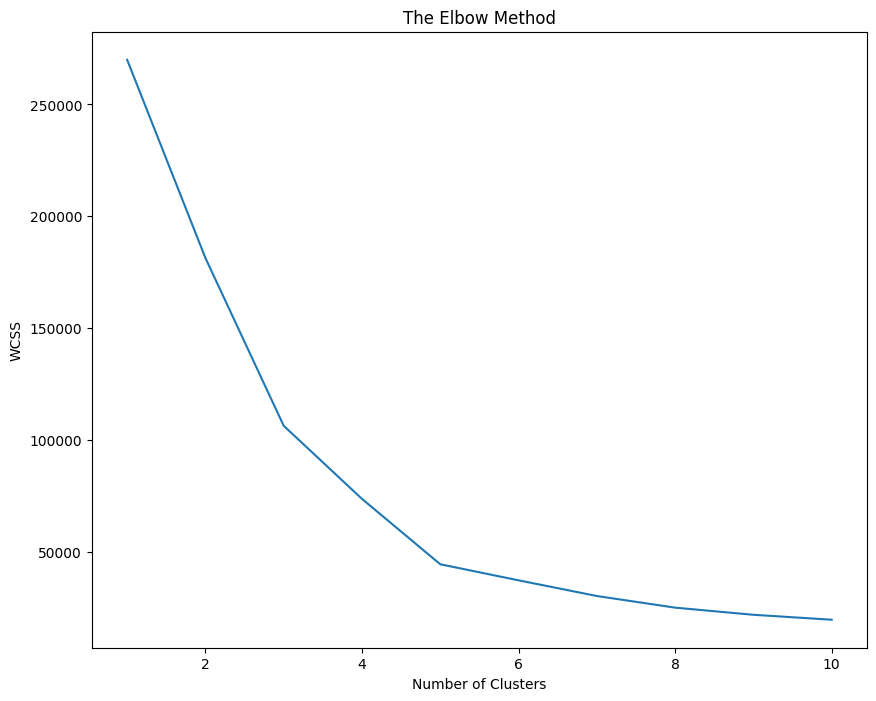

In [2]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [3]:
clf = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(X)

## Problem in  KMeans

While KMeans is a good algorithm, the time complexity is very poor. Kmeans works in $O(n \cdot K \cdot I \cdot f)$ Where 
n is number of records, K is number of clusters, I is number of iterations, f is number of features in particular record. Clearly, the algorithm will take forever to complete on a dataset of > 100,000 data points.

## Minibatch KMeans

Main features of Minibatch KMeans are:
1. Instead of using the entire dataset at once, it operates in batches.
2. Uses Gradient Descent update, which is way more faster than what KMeans does. 

How it works is, it takes batches of datasets and finds the centroids for the smaller dataset (minibatch) Then for the next batch, it uses the centroid found in previous batch and updates it using Gradient Descent. This simple method makes it faster by a magnitude of the input size. 


## Gotchas of using Minibatch KMeans
1. While the performance is good, the result might or might not be good -- it totally depends on the __initial conditions__.
2. The result might be somewhat different than what is obtained from KMeans. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
from sklearn.cluster import MiniBatchKMeans

clf = MiniBatchKMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_minikmeans = clf.fit_predict(X)

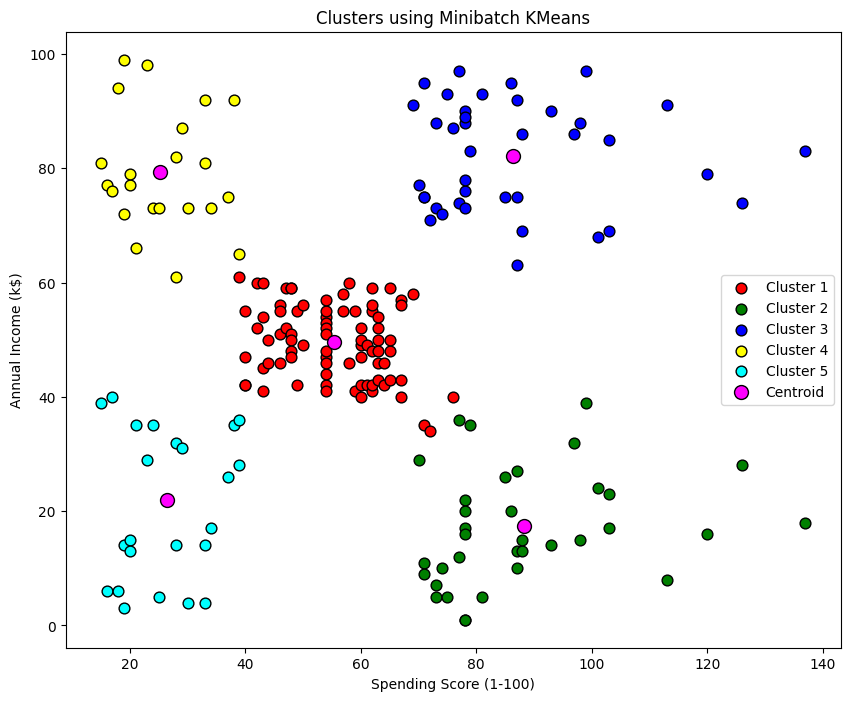

In [6]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_minikmeans == 0, 0], X[y_minikmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_minikmeans == 1, 0], X[y_minikmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_minikmeans == 2, 0], X[y_minikmeans == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_minikmeans == 3, 0], X[y_minikmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_minikmeans == 4, 0], X[y_minikmeans == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using Minibatch KMeans')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

## Types of Hierarchical Clustering:
1. Agglomerative: Bottom-up approach. Initially, each point is a cluster, then merged later. 
2. Divisive: Top-bottom approach. Initially, there is only one cluster, then separated later. 


### Agglomertive Clustering:
1. Make each point a single cluster
2. Take two closest points and merge them in one cluster.
3. Repeat step 2 till only one cluster left. 

While choosing the closest points, there are multiple ways to go:
1. Take the distance of two closest point in clusters
2. Average distance
3. Centroid distance
4. Farthest points etc. 

All the information is stored in a data structure called Dendogram. Where you can set the threshold and get the required number of clusters. 

### HC is computionally expensive $O(N^2 Log(N))$ hence is not recommended on huge datasets

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df.head()

X = df.iloc[:, [3, 4]].values

Dendrogram is a tree like structure that shows the hierarchy of the clusters. It's a good way to find the optimal number of clusters. 

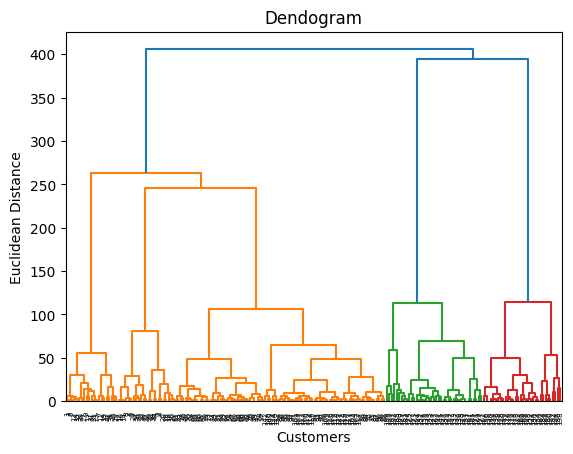

In [9]:
# Using Dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [13]:
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

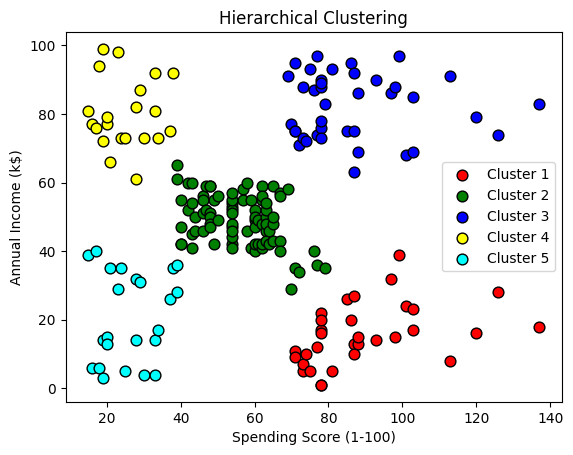

In [14]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
# plt.scatter(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Hierarchical Clustering')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

## Image Quantization

Image Quantization is a technique to compress image from continuous values to discrete values. It's a lossy compression and reduces the file size significantly. 

We can use KMeans clustering to compress the image. We'll convert RGB values that range from 0 - 255 to 5  values only. And convert the image from RGB to one with only 5 colors. 

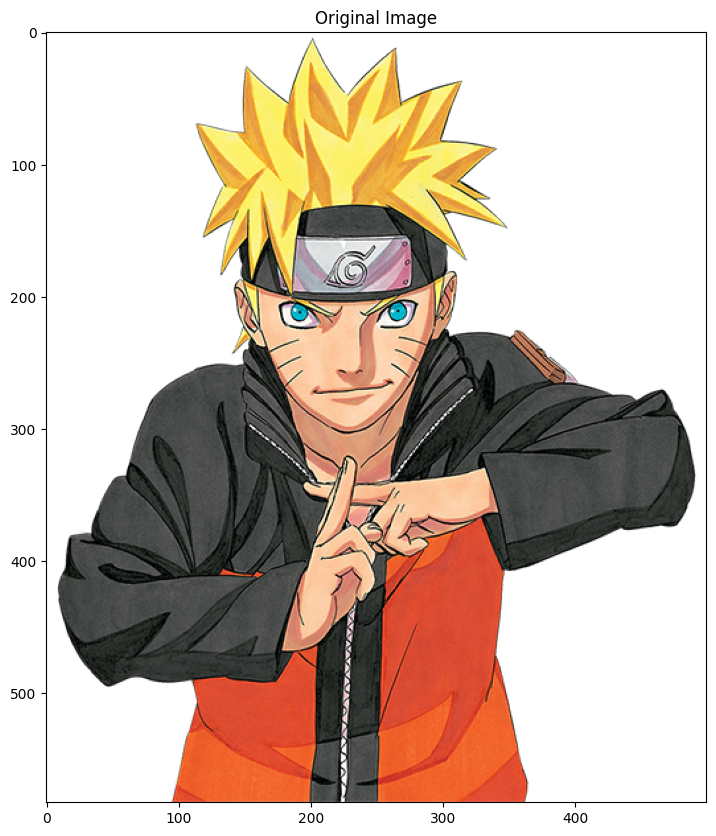

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14, 10))
image = plt.imread("../images/naruto.png")
plt.title("Original Image")
plt.imshow(image)
plt.show()

In [19]:
# Original image has three dimesntions one for each R, G, and B. 
# We'll convert it into 2D by reducing one dimension
x, y, z = image.shape
image = image.reshape(x*y, z)
image.shape

(291500, 4)

In [20]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=5)
clf.fit(image)

KMeans(n_clusters=5)

Now the cluster_centers_ will represent 5 different colors. We'll use the same colors to represent the entire image. Using the labels_ array, which will classify every pixel and assign a cluster, we can index the cluster\_centers\_ array which has cluster colors. 

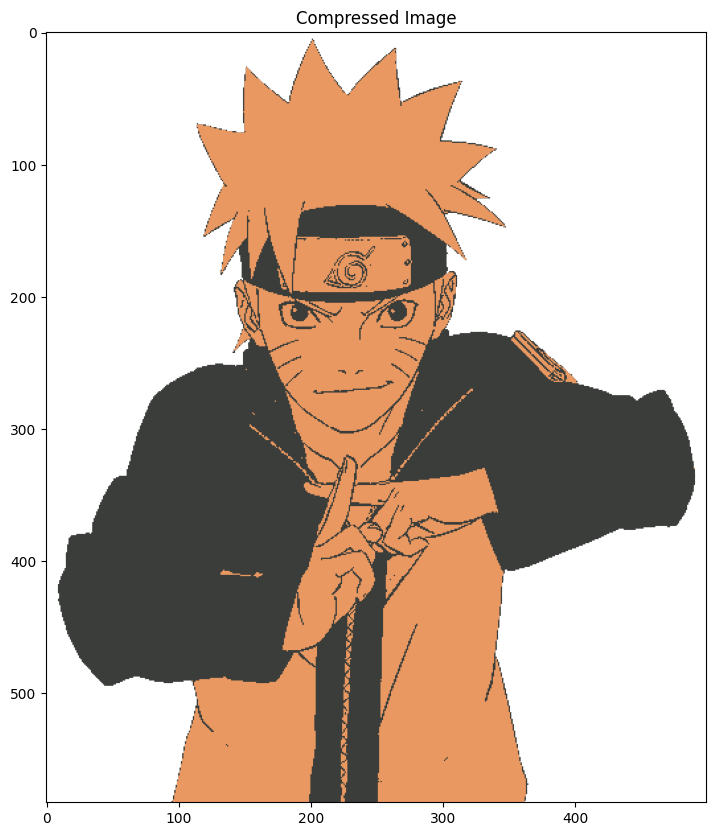

In [21]:
centers = clf.cluster_centers_
labels = clf.labels_
fig = plt.figure(figsize=(14, 10))
plt.title("Compressed Image")
plt.imshow(centers[labels].reshape(x, y, z))
plt.show()

## Outliers
Not all data can be trusted, many times we can have error in data which might lead to poor models. Such erroneous data points that can be introduced due to human errors / conversion errors are called __Outliers__. There are certain models that are sensitive to outliers (e.g. Linear Regression) hence presence of such outliers will degrade the performance of your machine learning model. 

### Outlier removal
Outlier removal is the process of removing such outliers and making your model better. An application of KMeans clustering is outlier removal. We can use the following algorithm to achieve that:

1. Cluster the data using KMeans. 
2. Find $n$ points fatherest from centroids. 
3. If any of the $n$ points are significantly far from the cluster centroid then remove these points. 

In [22]:
# create a fake dataset 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs


X, y = make_blobs(100, centers=1)

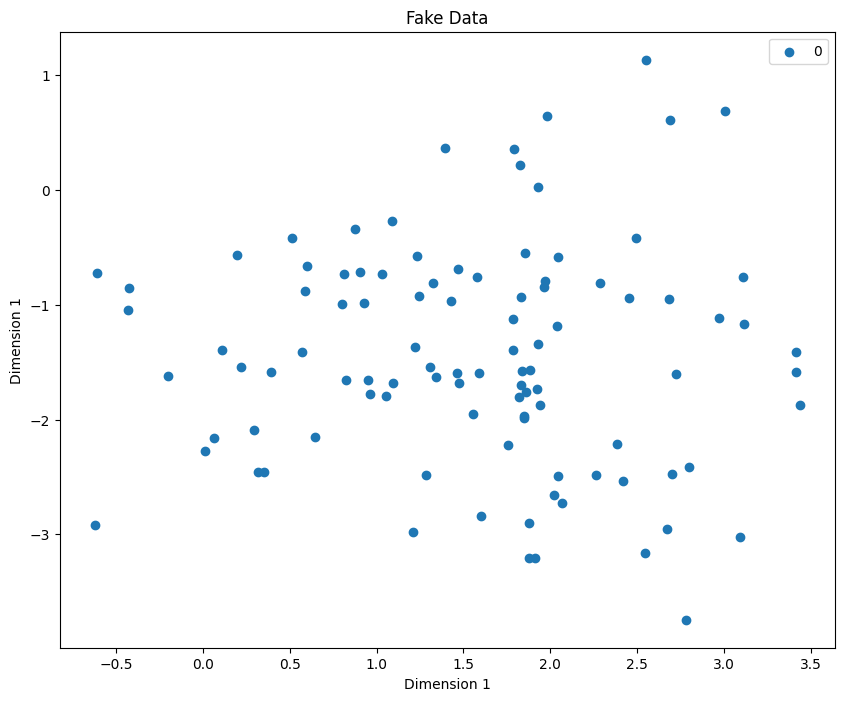

In [23]:
# visualize the data

fig = plt.figure(figsize=(10, 8))
def plot_clusters(X, y):
    for label in np.unique(y):
        plt.scatter(X[y==label][:, 0], X[y==label][:, 1], label=label)
    plt.legend()
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 1")
    plt.title("Fake Data")
plot_clusters(X, y)

Next step is to use KMeans to identify cluster centroids. The Mathematician inside you might be inclined to say why not just find the centroid directly averaging the x and y values. In our example, that'll work, but imagine having 5 clusters, so we don't know the clusters beforehands so that the reason why we use KMeans!

In [24]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=1)
clf.fit(X)
centroids = clf.cluster_centers_


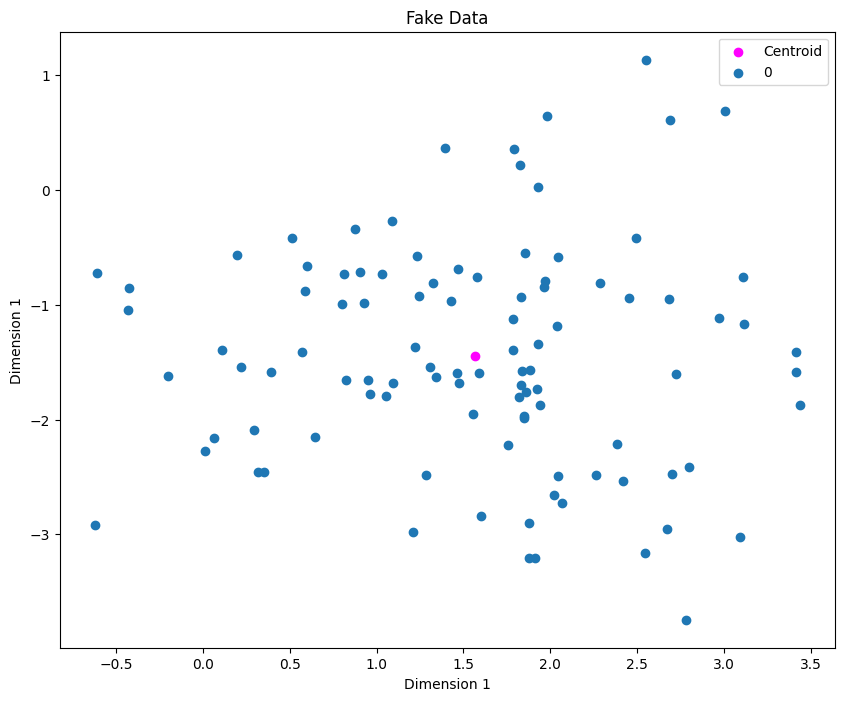

In [25]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(centroids[0][0], centroids[0][1], label="Centroid", color="magenta")
plot_clusters(X, y)

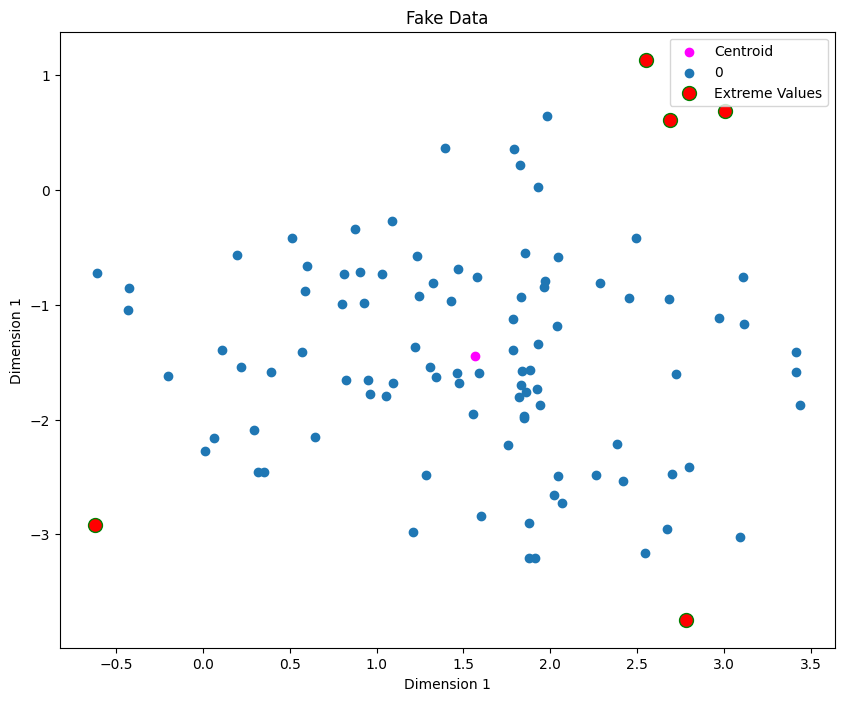

In [26]:
distances = clf.transform(X)
fig = plt.figure(figsize=(10, 8))

plt.scatter(centroids[0][0], centroids[0][1], label="Centroid", color="magenta")

sorted_indices = list(reversed(np.argsort(distances.ravel())))[:5]
plot_clusters(X, y)

plt.scatter(X[sorted_indices][:, 0], X[sorted_indices][:, 1], color="red", edgecolor="green", 
            s=100, label="Extreme Values")
plt.legend()
plt.show()

We can treat the 5 extreme points as outliers. Now we'll remove them and refit the model

In [27]:
X = np.delete(X, sorted_indices, axis=0) # important to mention axis=0
y = np.delete(y, sorted_indices, axis=0)

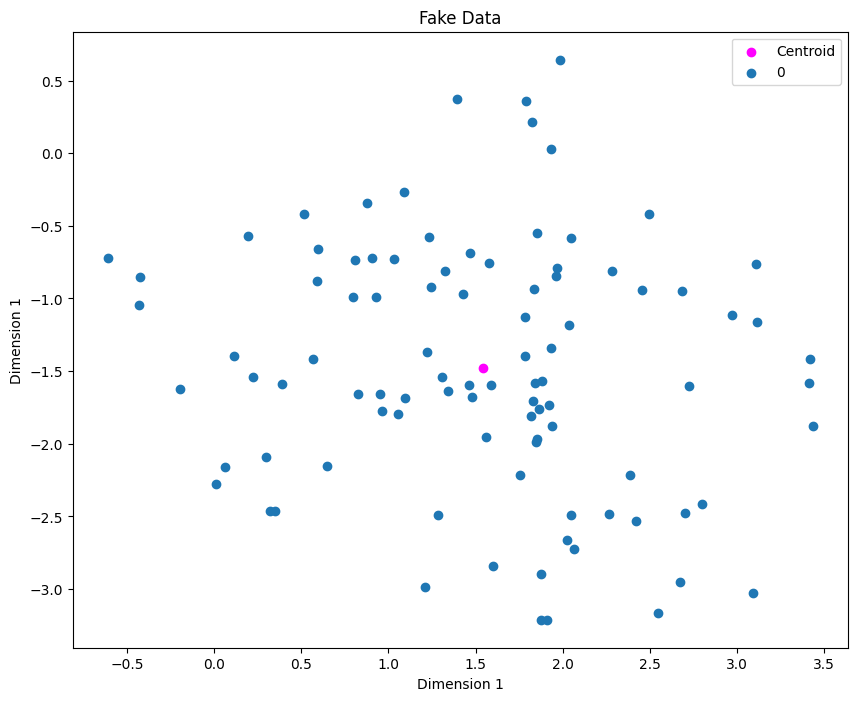

In [28]:
clf = KMeans(n_clusters=1)
clf.fit(X)

fig = plt.figure(figsize=(10, 8))
centroids = clf.cluster_centers_
plt.scatter(centroids[0][0], centroids[0][1], label="Centroid", color="magenta")
plot_clusters(X, y)